# FILTRO IIR

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sympy

## EEG_reposo sin movimiento 

In [8]:
Fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno1.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/Fs;

In [9]:
#DOMINIO DE FRECUENCIA
N=2**10 # 10 bits

X = np.fft.fft(x,N)
X = X[0:N//2]
Xm = np.abs(X)
F = np.linspace(0,Fs/2,N//2)

C:\Users\nad_a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_filter_design.py:2240: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  return normalize(bprime, aprime)


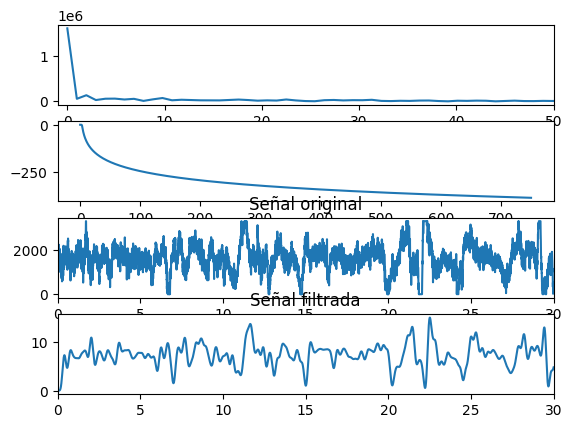

In [10]:
#DISEÑO DEL FILTRO
wp=2*np.pi*3
ws=2*np.pi*4

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=20, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 




# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)

# TRansformada bilineal de H(s) a H(z)
bd, ad = signal.bilinear(b,a,Fs)
Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)
Hdm = np.abs(Hd)

#FILTRADO
y = signal.lfilter(bd,ad, x)

N=2048

Yf = np.fft.fft(y,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)

plt.figure()
plt.subplot(4, 1, 1)
#plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)

plt.subplot(4, 1, 2)
plt.plot(F_freqs, 20 * np.log10(Hm))


plt.subplot(4, 1, 3)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(4, 1, 4)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()

## EEG_OjosAbiertos_OjosCerrados

In [11]:
Fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno2.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/Fs;

In [12]:
#DOMINIO DE FRECUENCIA
N=2**10 # 10 bits

X = np.fft.fft(x,N)
X = X[0:N//2]
Xm = np.abs(X)
F = np.linspace(0,Fs/2,N//2)

C:\Users\nad_a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_filter_design.py:2240: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  return normalize(bprime, aprime)


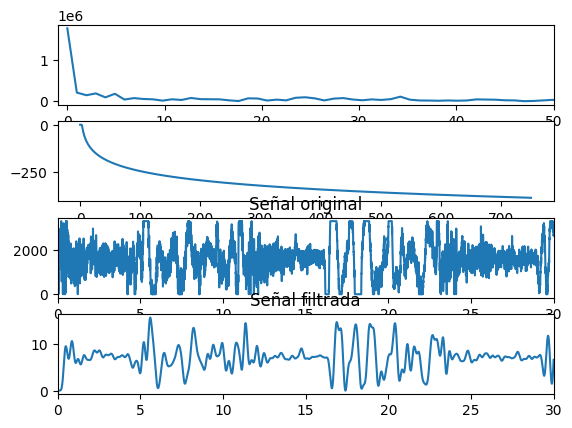

In [13]:
#DISEÑO DEL FILTRO
wp=2*np.pi*3
ws=2*np.pi*4

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=20, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 




# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)

# TRansformada bilineal de H(s) a H(z)
bd, ad = signal.bilinear(b,a,Fs)
Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)
Hdm = np.abs(Hd)

#FILTRADO
y = signal.lfilter(bd,ad, x)

N=2048

Yf = np.fft.fft(y,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)

plt.figure()
plt.subplot(4, 1, 1)
#plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)

plt.subplot(4, 1, 2)
plt.plot(F_freqs, 20 * np.log10(Hm))


plt.subplot(4, 1, 3)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(4, 1, 4)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()

## EEG_Referencia

In [14]:
Fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno3.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/Fs;

In [15]:
#DOMINIO DE FRECUENCIA
N=2**10 # 10 bits

X = np.fft.fft(x,N)
X = X[0:N//2]
Xm = np.abs(X)
F = np.linspace(0,Fs/2,N//2)

C:\Users\nad_a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_filter_design.py:2240: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  return normalize(bprime, aprime)


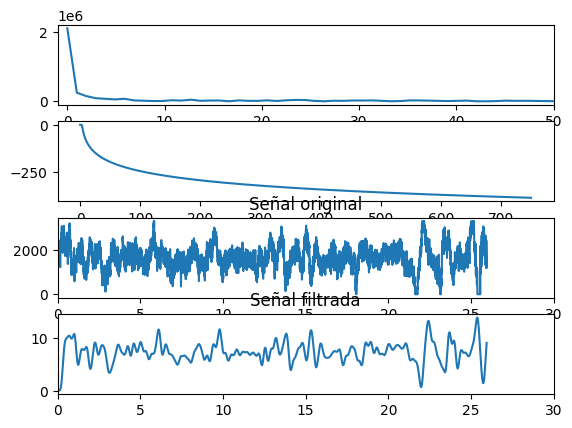

In [16]:
#DISEÑO DEL FILTRO
wp=2*np.pi*3
ws=2*np.pi*4

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=20, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 

# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)

# TRansformada bilineal de H(s) a H(z)
bd, ad = signal.bilinear(b,a,Fs)
Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)
Hdm = np.abs(Hd)

#FILTRADO
y = signal.lfilter(bd,ad, x)

N=2048

Yf = np.fft.fft(y,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)

plt.figure()
plt.subplot(4, 1, 1)
#plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)

plt.subplot(4, 1, 2)
plt.plot(F_freqs, 20 * np.log10(Hm))


plt.subplot(4, 1, 3)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(4, 1, 4)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()

## EEG_Resolucion_mat

In [17]:
Fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno4.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/Fs;

In [18]:
#DOMINIO DE FRECUENCIA
N=2**10 # 10 bits

X = np.fft.fft(x,N)
X = X[0:N//2]
Xm = np.abs(X)
F = np.linspace(0,Fs/2,N//2)

C:\Users\nad_a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_filter_design.py:2240: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  return normalize(bprime, aprime)


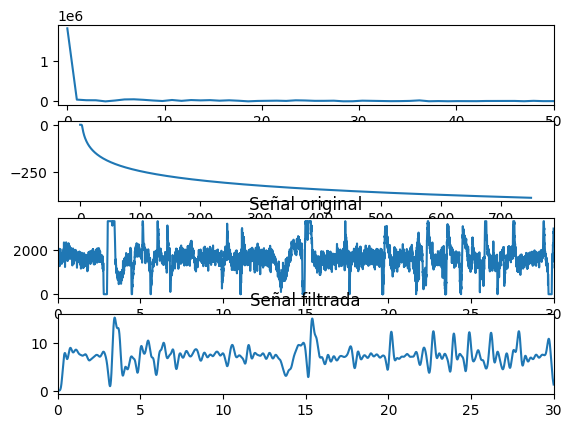

In [19]:
#DISEÑO DEL FILTRO
wp=2*np.pi*3
ws=2*np.pi*4

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=20, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 




# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)

# TRansformada bilineal de H(s) a H(z)
bd, ad = signal.bilinear(b,a,Fs)
Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)
Hdm = np.abs(Hd)

#FILTRADO
y = signal.lfilter(bd,ad, x)

N=2048

Yf = np.fft.fft(y,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)

plt.figure()
plt.subplot(4, 1, 1)
#plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)

plt.subplot(4, 1, 2)
plt.plot(F_freqs, 20 * np.log10(Hm))


plt.subplot(4, 1, 3)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(4, 1, 4)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()